In [ ]:
from keras.datasets import reuters 

(train_data,train_label),(test_data,test_label) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(train_data)

2246

In [ ]:
train_data.shape

(8982,)

In [ ]:
len(train_data[0])

87

In [ ]:
len(train_data[1])

56

In [ ]:
train_data[0]

In [ ]:
word_index = reuters.get_word_index()
word_index

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

In [ ]:
decoded = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
train_label[0]

In [ ]:
train_label

In [ ]:
### Y값 변형 => one-hot 
from keras.utils import to_categorical

one_hot_train_label = to_categorical(train_label)
one_hot_test_label = to_categorical(test_label)

In [ ]:
one_hot_train_label.shape

(8982, 46)

In [ ]:
### X값 변형 -> 정형화 
import numpy as np 
def vectorize_seq(sequences, dimension=10000):    #8982건
  results = np.zeros((len(sequences), dimension))   #(8982, 10000)
  for i, s in enumerate(sequences):
    results[i, s] = 1.
  return results

In [ ]:
x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

In [ ]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
x_train.shape

(8982, 10000)

In [ ]:
### 모델링 
from keras import models 
from keras import layers 

model = models.Sequential() 
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]    #검증용 x
partial_x_train = x_train[1000:]  #학습용 x

y_val = one_hot_train_label[:1000]  #검증용 y
partial_y_train = one_hot_train_label[1000:]  # 학습용 y

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 64ms/step - loss: 2.6066 - accuracy: 0.5301 - val_loss: 1.7054 - val_accuracy: 0.6430
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.4017 - accuracy: 0.7028 - val_loss: 1.3073 - val_accuracy: 0.7220
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.0408 - accuracy: 0.7784 - val_loss: 1.1310 - val_accuracy: 0.7600
Epoch 4/20
16/16 [==============================] - 1s 45ms/step - loss: 0.8176 - accuracy: 0.8282 - val_loss: 1.0323 - val_accuracy: 0.7970
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 0.6505 - accuracy: 0.8641 - val_loss: 0.9834 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 1s 46ms/step - loss: 0.5184 - accuracy: 0.8898 - val_loss: 0.9337 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 1s 44ms/step - loss: 0.4150 - accuracy: 0.9121 - val_loss: 0.9160 - val_accuracy: 0.8110
Epoch 8/20
16

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

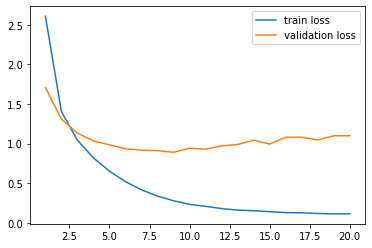

In [ ]:
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.legend() 
plt.show()

In [ ]:
from keras import backend as K 

K.clear_session()

In [ ]:
history = model.fit(x_train, one_hot_train_label, epochs=9, batch_size=512)

Epoch 1/9
18/18 [==============================] - 1s 44ms/step - loss: 0.2153 - accuracy: 0.9414
Epoch 2/9
18/18 [==============================] - 1s 45ms/step - loss: 0.1648 - accuracy: 0.9475
Epoch 3/9
18/18 [==============================] - 1s 45ms/step - loss: 0.1406 - accuracy: 0.9508
Epoch 4/9
18/18 [==============================] - 1s 43ms/step - loss: 0.1307 - accuracy: 0.9531
Epoch 5/9
18/18 [==============================] - 1s 46ms/step - loss: 0.1190 - accuracy: 0.9560
Epoch 6/9
18/18 [==============================] - 1s 44ms/step - loss: 0.1191 - accuracy: 0.9550
Epoch 7/9
18/18 [==============================] - 1s 45ms/step - loss: 0.1124 - accuracy: 0.9555
Epoch 8/9
18/18 [==============================] - 1s 45ms/step - loss: 0.1100 - accuracy: 0.9547
Epoch 9/9
18/18 [==============================] - 1s 45ms/step - loss: 0.1078 - accuracy: 0.9550


In [ ]:
model.evaluate(x_test, one_hot_test_label)

71/71 [==============================] - 0s 4ms/step - loss: 1.2773 - accuracy: 0.7858


[1.2772724628448486, 0.7858415246009827]

In [ ]:
# Y값을 one-hot 변형 하지 않고 그대로 사용
train_label
test_label 

In [ ]:
model = models.Sequential() 
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, train_label, epochs=9, batch_size=512)

Epoch 1/9
18/18 [==============================] - 1s 42ms/step - loss: 2.4466 - accuracy: 0.5387
Epoch 2/9
18/18 [==============================] - 1s 41ms/step - loss: 1.2984 - accuracy: 0.7243
Epoch 3/9
18/18 [==============================] - 1s 42ms/step - loss: 0.9745 - accuracy: 0.7971
Epoch 4/9
18/18 [==============================] - 1s 41ms/step - loss: 0.7602 - accuracy: 0.8380
Epoch 5/9
18/18 [==============================] - 1s 42ms/step - loss: 0.5977 - accuracy: 0.8691
Epoch 6/9
18/18 [==============================] - 1s 42ms/step - loss: 0.4726 - accuracy: 0.8989
Epoch 7/9
18/18 [==============================] - 1s 42ms/step - loss: 0.3768 - accuracy: 0.9200
Epoch 8/9
18/18 [==============================] - 1s 43ms/step - loss: 0.3078 - accuracy: 0.9336
Epoch 9/9
18/18 [==============================] - 1s 42ms/step - loss: 0.2554 - accuracy: 0.9411
